In [ ]:
# import modules
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

In [ ]:
# mounting Google Drive and setting path
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/DS301 Final Project/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading in data
X = pd.read_csv(path + "calls_data.csv")
y = pd.read_csv(path + "calls_target.csv")

# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Additional Preprocessing

In [ ]:
# function to convert data into 3D array
def create_dataset(X, time_steps = 1):
  return np.array([X[i:(i + time_steps)] for i in range(len(X) - time_steps)])

In [ ]:
# apply function to dataset with time steps
time_steps = 5
X_train_3D = create_dataset(X_train.values, time_steps)
X_train_3D.shape

(798079, 5, 29)

In [ ]:
# convert test dataset features to 3D array
X_test_3D = create_dataset(X_test, time_steps)
y_test_3D = create_dataset(y_test, time_steps)

# Training the SimpleRNN

In [ ]:
# define RNN model architecture
model = Sequential()
model.add(SimpleRNN(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model.add(SimpleRNN(50))
model.add(Dense(1))

model.compile(loss = "mse", optimizer = Adam())

In [ ]:
rnn = model.fit(X_train_3D, 
                y_train, 
                epochs = 15, 
                batch_size = 32, 
                validation_split = 0.2)

Epoch 1/15
19952/19952 [==============================] - 147s 7ms/step - loss: 96036.9297 - val_loss: 81981.3281
Epoch 2/15
19952/19952 [==============================] - 122s 6ms/step - loss: 82260.2656 - val_loss: 81982.0625
Epoch 3/15
19952/19952 [==============================] - 124s 6ms/step - loss: 82258.4688 - val_loss: 81986.5000
Epoch 4/15
19952/19952 [==============================] - 109s 5ms/step - loss: 82263.3750 - val_loss: 81982.4219
Epoch 5/15
19952/19952 [==============================] - 106s 5ms/step - loss: 69539.7500 - val_loss: 63910.4023
Epoch 6/15
19952/19952 [==============================] - 108s 5ms/step - loss: 61592.7969 - val_loss: 62054.7891
Epoch 7/15
19952/19952 [==============================] - 107s 5ms/step - loss: 60316.2969 - val_loss: 61723.3750
Epoch 8/15
19952/19952 [==============================] - 104s 5ms/step - loss: 63102.5508 - val_loss: 64876.3438
Epoch 9/15
19952/19952 [==============================] - 103s 5ms/step - loss: 64634.05

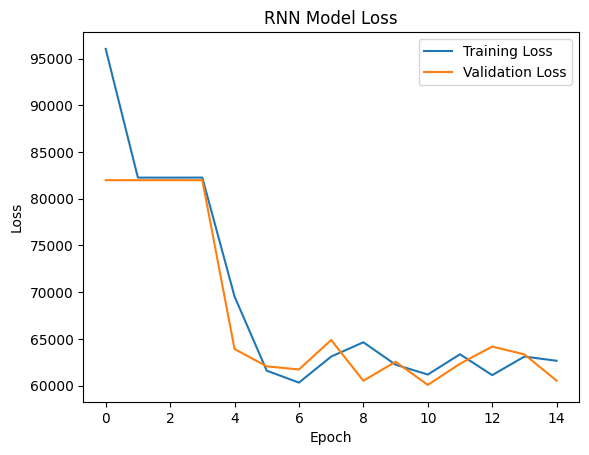

In [ ]:
plt.plot(rnn.history['loss'])
plt.plot(rnn.history['val_loss'])
plt.title("RNN Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
model.evaluate(X_test_3D, y_test_3D)

6235/6235 [==============================] - 15s 2ms/step - loss: 96904.0078


96904.0078125

In [ ]:
model.save("drive/MyDrive/DS301 Final Project/models/rnn_calls")

# Training the LSTM

In [ ]:
# define LSTM model architecture
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss = "mse", optimizer = Adam())

In [ ]:
lstm = model.fit(X_train_3D,
                 y_train, 
                 epochs = 15, 
                 batch_size = 32,
                 validation_split = 0.2)

Epoch 1/15
19952/19952 [==============================] - 210s 10ms/step - loss: 89281.2969 - val_loss: 67858.7109
Epoch 2/15
19952/19952 [==============================] - 203s 10ms/step - loss: 62846.7969 - val_loss: 60279.4609
Epoch 3/15
19952/19952 [==============================] - 202s 10ms/step - loss: 61882.5273 - val_loss: 63518.6523
Epoch 4/15
19952/19952 [==============================] - 203s 10ms/step - loss: 62599.4766 - val_loss: 62738.2578
Epoch 5/15
19952/19952 [==============================] - 204s 10ms/step - loss: 62377.4062 - val_loss: 62842.5273
Epoch 6/15
19952/19952 [==============================] - 202s 10ms/step - loss: 62413.4805 - val_loss: 63977.3555
Epoch 7/15
19952/19952 [==============================] - 211s 11ms/step - loss: 62791.8672 - val_loss: 64289.8555
Epoch 8/15
19952/19952 [==============================] - 201s 10ms/step - loss: 64246.4648 - val_loss: 66876.2188
Epoch 9/15
19952/19952 [==============================] - 201s 10ms/step - loss:

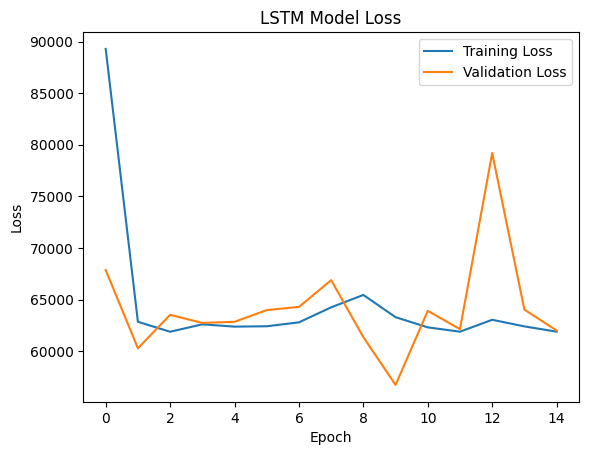

In [ ]:
plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title("LSTM Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
model.evaluate(X_test_3D, y_test_3D)

6235/6235 [==============================] - 22s 3ms/step - loss: 90779.0469


90779.046875

In [ ]:
model.save("drive/MyDrive/DS301 Final Project/models/lstm_calls")

# Training the GRU

In [ ]:
# define GRU model architecture
model = Sequential()
model.add(GRU(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model.add(GRU(50))
model.add(Dense(1))

model.compile(loss = "mse", optimizer = Adam())

In [ ]:
gru = model.fit(X_train_3D,
                y_train, 
                epochs = 15,
                batch_size = 32,
                validation_split = 0.2)

Epoch 1/15
19952/19952 [==============================] - 206s 10ms/step - loss: 89242.1094 - val_loss: 63917.0938
Epoch 2/15
19952/19952 [==============================] - 218s 11ms/step - loss: 62546.0352 - val_loss: 59473.3594
Epoch 3/15
19952/19952 [==============================] - 219s 11ms/step - loss: 59845.6094 - val_loss: 59309.6914
Epoch 4/15
19952/19952 [==============================] - 229s 11ms/step - loss: 62245.1523 - val_loss: 60535.8203
Epoch 5/15
19952/19952 [==============================] - 230s 12ms/step - loss: 65232.9375 - val_loss: 66974.5312
Epoch 6/15
19952/19952 [==============================] - 223s 11ms/step - loss: 63578.4102 - val_loss: 59165.0312
Epoch 7/15
19952/19952 [==============================] - 220s 11ms/step - loss: 62206.9297 - val_loss: 65097.8594
Epoch 8/15
19952/19952 [==============================] - 230s 12ms/step - loss: 66586.3906 - val_loss: 60632.3516
Epoch 9/15
19952/19952 [==============================] - 222s 11ms/step - loss:

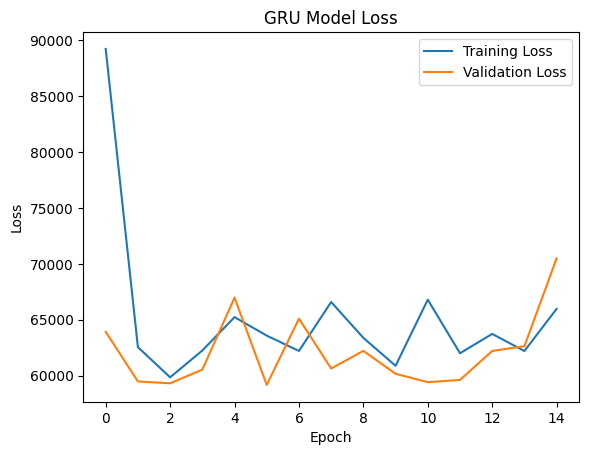

In [ ]:
plt.plot(gru.history['loss'])
plt.plot(gru.history['val_loss'])
plt.title("GRU Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
model.evaluate(X_test_3D, y_test_3D)

6235/6235 [==============================] - 24s 4ms/step - loss: 89032.7578


89032.7578125

In [ ]:
model.save("drive/MyDrive/DS301 Final Project/models/gru_calls")